# Neural Network for Learning NBA Points Data

## Library Import

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Seed Data and RNG Data Set

In [3]:
np.random.seed(0)

# Generate synthetic team statistics for home and away teams 
num_samples = 1000
data = {
    'home_off_rating': np.random.normal(110, 5, num_samples),
    'home_def_rating': np.random.normal(105, 5, num_samples),
    'away_off_rating': np.random.normal(108, 5, num_samples),
    'away_def_rating': np.random.normal(104, 5, num_samples)
}

data ['point_diff'] = (
    data['home_off_rating'] - data['away_def_rating'] + 
    (np.random.normal(0, 5, num_samples)) # random noise
)

df = pd.DataFrame(data)
df.head()

home_off_rating  home_def_rating  away_off_rating  away_def_rating  \
0       118.820262       107.779813       100.335395       111.966368   
1       112.000786       109.462369        99.440149       106.843612   
2       114.893690       102.888426       108.230675       103.427565   
3       121.204466       105.523570       103.208128       105.258151   
4       119.337790       106.140267       107.595942        97.945722   

   point_diff  
0    9.920639  
1   14.375674  
2   12.821580  
3   21.628553  
4   12.700409

## Prepare features and target value

In [4]:
X = df.drop(columns=['point_diff'])
y = df['point_diff']

# Split into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Scale the features

In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Define the neural network model

In [6]:
# Initialize sequential model 
model = Sequential([
    Input(shape=(X_train.shape[1],)), # define input shape
    Dense(64, activation = 'relu'), # input layer with 64 units
    Dropout(0.2), # Dropout layer to prevent overfitting
    Dense(32, activation = 'relu'), # Hidden layer with 32 units 
    Dense(1) # Output layer with 1 unit for regression (predicting point diff)
])

# Compile the model 
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 99.1316 - mae: 7.8870 - val_loss: 104.8943 - val_mae: 8.2738
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 89.8017 - mae: 7.4664 - val_loss: 92.8789 - val_mae: 7.7790
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 90.9649 - mae: 7.4554 - val_loss: 77.7109 - val_mae: 7.1106
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.1930 - mae: 6.6127 - val_loss: 60.3001 - val_mae: 6.2253
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 55.8901 - mae: 5.9460 - val_loss: 43.9330 - val_mae: 5.2452
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39.9554 - mae: 4.9703 - val_loss: 33.7777 - val_mae: 4.5437
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30.9330 - mae: 4.3998 - val_loss: 29.1350 - val_mae: 4.2208
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 30.7328 - mae: 4.4569 - val_loss: 27.8801 - val_mae: 4.1578
Epoch 9/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - lo

## Visualize History

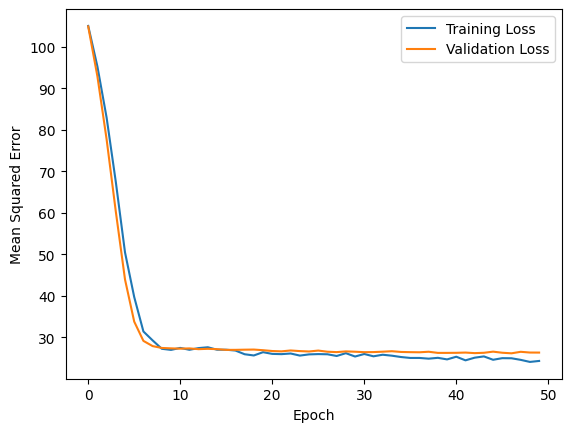

In [8]:
# Plot training and validaiton loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

## Evaluation and Target Prediction

In [9]:
# Evaluate model on test data
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}")
print(f"Test MAE: {test_mae}")

# Target prediction
sample_predictions= model.predict(X_test[:5])
print("Sample Predictions (Point Differential):", sample_predictions.flatten())
print("Actual Values (Point Differential):", y_test[:5].values)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.2705 - mae: 4.1814  
Test Loss (MSE): 26.581865310668945
Test MAE: 4.185474395751953
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Sample Predictions (Point Differential): [11.516974  -3.100856   2.1586378  5.5883775  2.8419855]
Actual Values (Point Differential): [ 7.65366384  1.7005336   6.79851836  3.34935956 -2.68112336]
